# Travel Package Purchase Prediction Study

## Aim:

We have been tasked to provide a concise analysis of the dataset given and create a model that predicts which customers are more likely to purchase the newly introduced package, 'Wellness Toruism Package' to help the Policy Makers and Marketing Team to establish a viable business model that shall help expand the customer base.

## Attribute Information:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Importing Necessary Libraries such as pandas, numpy, matplotlib.pyplot, seaborn

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

## Reading the data from an .xlsx file

In [2]:
#read xlsx into a dataframe called 'data' and read the second sheet
data = pd.read_excel('C:/Users/zeezu/Desktop/Python Coding/csv/Tourism.xlsx', sheet_name=1)

In [3]:
#copying the data frame into a new data frame to retain original data.
df = pd.DataFrame(data)

## Checking first 5 rows and 10 random rows to get a nice overview

In [4]:
#Checking the first 10 rows of the dataset
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 8 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(10)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


### Observations

* The data has 20 columns. It looks like there are some missing values present in the dataset that we might have to take a closer look at.
* By face value, it looks like there are 6 categorcial variables, namely: `TypeOfContract`, `Occupation`, `Gender`, `ProductPitched`, `MaritalStatus` and `Designation`.

## Checking the info of the dataset

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Observations

* `Age`, `TypeofContact` and some other columns have some missing values.
* There are three data types represented across all columns: float64, int64 and object.
* The columns that are of the type object need to be changed to categorical types.
* The dependent variable for this dataset should be the `prodTaken` column.


## Checking a description of the data

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888,NaN,NaN,NaN,202444,1411.19,200000,201222,202444,203665,204887
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6


### Observations

* `TypeofContact` has two unique variables, where we see the most frequent being 'Self Enquiry'.
* `Occupation` has 4 unique variables, where the most frequent of them is 'Salaried'.
* `Gender` has 3 unique variables, which is odd and needs to be looked at.
* `ProductPitched` and `Designation` both have 5 unique variables while `MaritalStatus` has 4.

# Data Preprocessing

### Checking for missing values

In [8]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
df.isnull().any()

CustomerID                  False
ProdTaken                   False
Age                          True
TypeofContact                True
CityTier                    False
DurationOfPitch              True
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups            True
ProductPitched              False
PreferredPropertyStar        True
MaritalStatus               False
NumberOfTrips                True
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting     True
Designation                 False
MonthlyIncome                True
dtype: bool

* We can see some missing values in a couple of rows in multiple columns, we shall drop those rows from our data set.

### Checking unique values of every column

In [10]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [11]:
#Creating a dataframe containing the categorical variables
cat_cols = pd.DataFrame()

for cols in df.columns:
    if df[cols].dtype == "object":
        cat_cols[cols] = df[cols]
        
cat_cols.head(10)

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
5,Company Invited,Salaried,Male,Basic,Single,Executive
6,Self Enquiry,Small Business,Female,Basic,Divorced,Executive
7,Self Enquiry,Salaried,Male,Basic,Married,Executive
8,Company Invited,Salaried,Male,Standard,Unmarried,Senior Manager
9,Self Enquiry,Small Business,Male,Deluxe,Divorced,Manager


In [12]:
for val in cat_cols.columns:
    print(f'{(cat_cols[val].value_counts())}\n')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



* Here we can see that the `gender` column has what seems to be an error with the 'fe Male' variable. We shall have to treat that.
* We are also going to assume that 'unmarried' is it's own variable under the `MaritalStatus` column seeing as it is unclear what that exactly represents, therefore we shall just leave it as is.

### Fixing the categorical types

In [13]:
#Changing the types from object to categorical

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [14]:
#Checking to ensure changes took effect properly
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

The data types of the categorical variables have been fixed.

## Processing the `Gender` column

In [15]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
#Correcting the gender 'fe Male' error 

df['Gender'] = [val.replace('Fe Male','Female') for val in df['Gender']]

In [17]:
#Checking to make sure there are only two genders in our dataset (male,female)

df['Gender'].nunique()

2

# Exploratory Data Analysis

## Univariate analysis

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

### Let's explore the variable `Age`

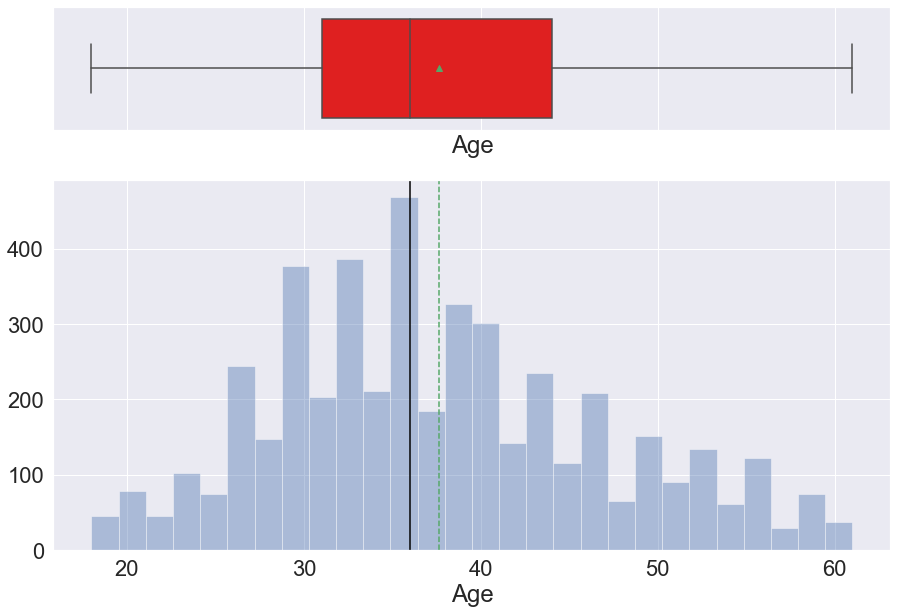

In [19]:
histogram_boxplot(df.Age);

* Slightly right skewed, most of the customers in our dataset are within the age range of 25-45.
* There are no outliers present in this distribution.

### Let's explore the variable `DurationOfPitch`

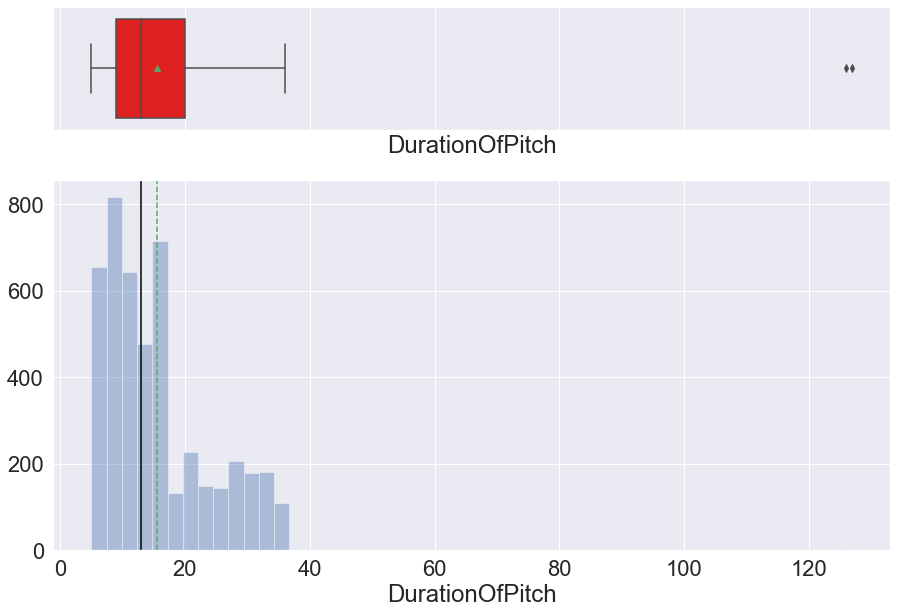

In [20]:
histogram_boxplot(df.DurationOfPitch);

* This is heavily right skewed, with some outliers to the right, which might have been an error considering virtually all our observations landed between 0-40 minutes.

### Let's explore the variable `MonthlyIncome`

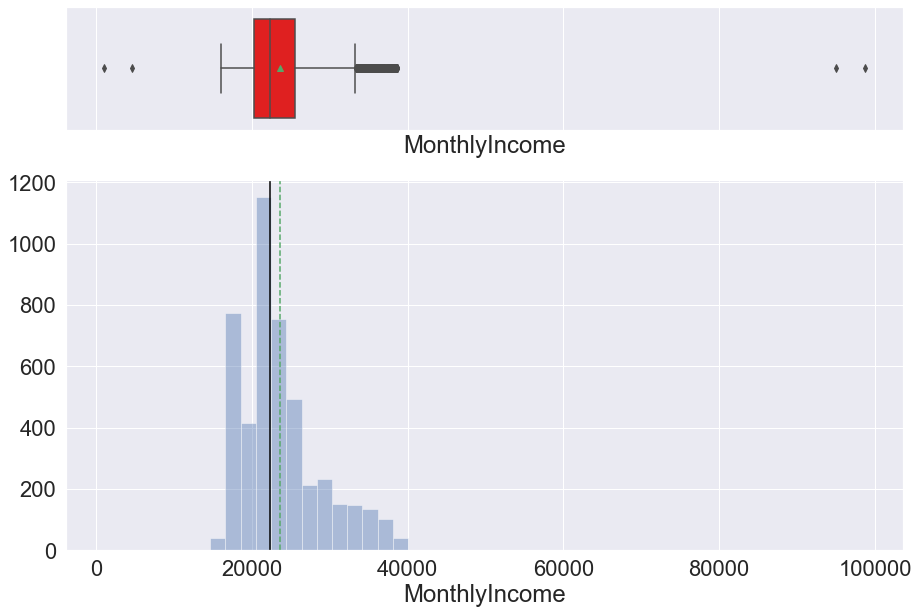

In [21]:
histogram_boxplot(df.MonthlyIncome);

* The mean and median for this distribution are really close, indicating no extreme skewness.
* There are a few outliers on the left side and numerous ones on the right, which may indicate there's a sect of customers that earn above average pay.

## Let's take a look at our dependent variable `ProdTaken`

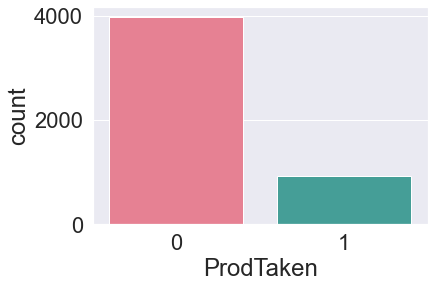

In [22]:
sns.countplot(df['ProdTaken'], palette='husl');

* Most customers in our dataset have not purchased a package before.

### Taking a look at the categorical variables

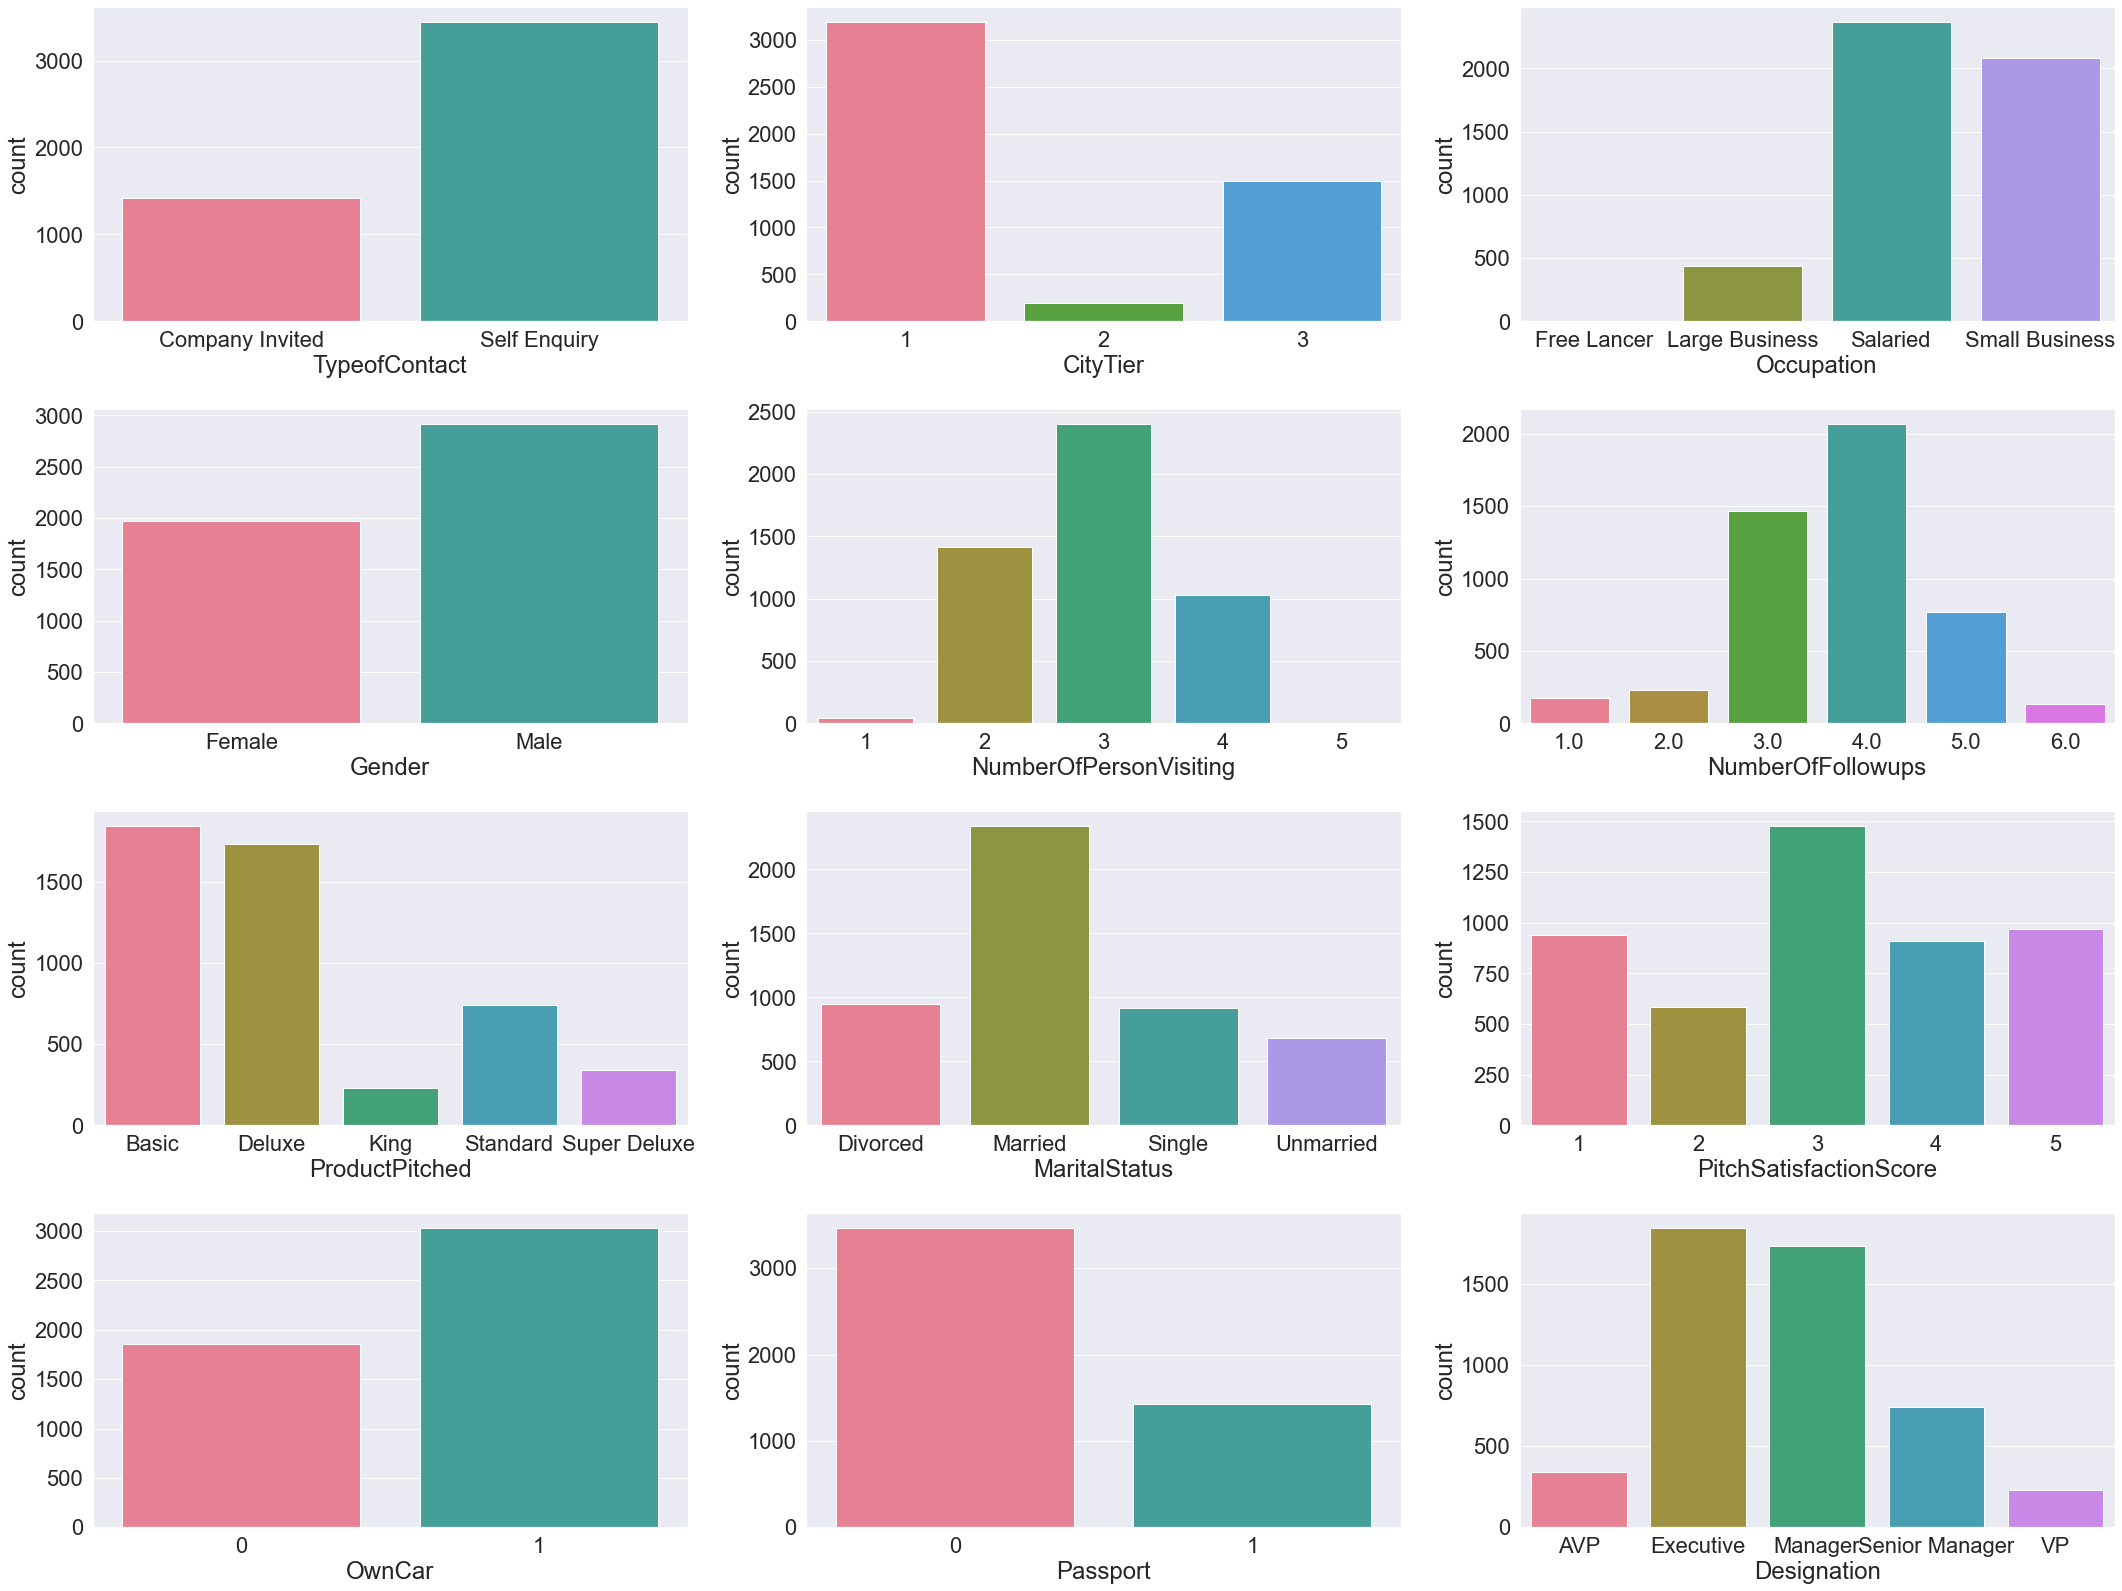

In [23]:
#Let's explore the yes/no columns and categorical columns

cat_cols = ['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups',
           'ProductPitched','MaritalStatus','PitchSatisfactionScore','OwnCar','Passport','Designation']

plt.figure(figsize=(30,100))

for i in range(len(cat_cols)):
    plt.subplot(18,3,i+1)
    sns.countplot(df[cat_cols[i]],palette='husl')
    plt.tight_layout()

plt.show()

#### Observations
* `TypeofContact` shows us that more customers reach out to the company and enquire rather than being invited by the company.
* `CityTier` has Tier 1 customers being the most in our dataset, which could indicate the customers who buy this package are mainly from areas with little development in terms of their living standards and community.
* The `Occupation` chart shows that most customers collect salaries and there are almost no customers who are freelancers interested in this package.
* Most customers in our dataset are male.
* The most preferred number of people that a customer would want to visit with is 3.
* The most pitched product is the Basic plan followed by the Deluxe plan with the King plan being the least pitched by salespersons.
* More customers in our dataset own a car than those who don't.
* More customers don't own a passport also.

## Bivariate Analysis

We shall plot some graphs that shall help us take a look and understand some of the interactions between the numerous variables 

### Correlation

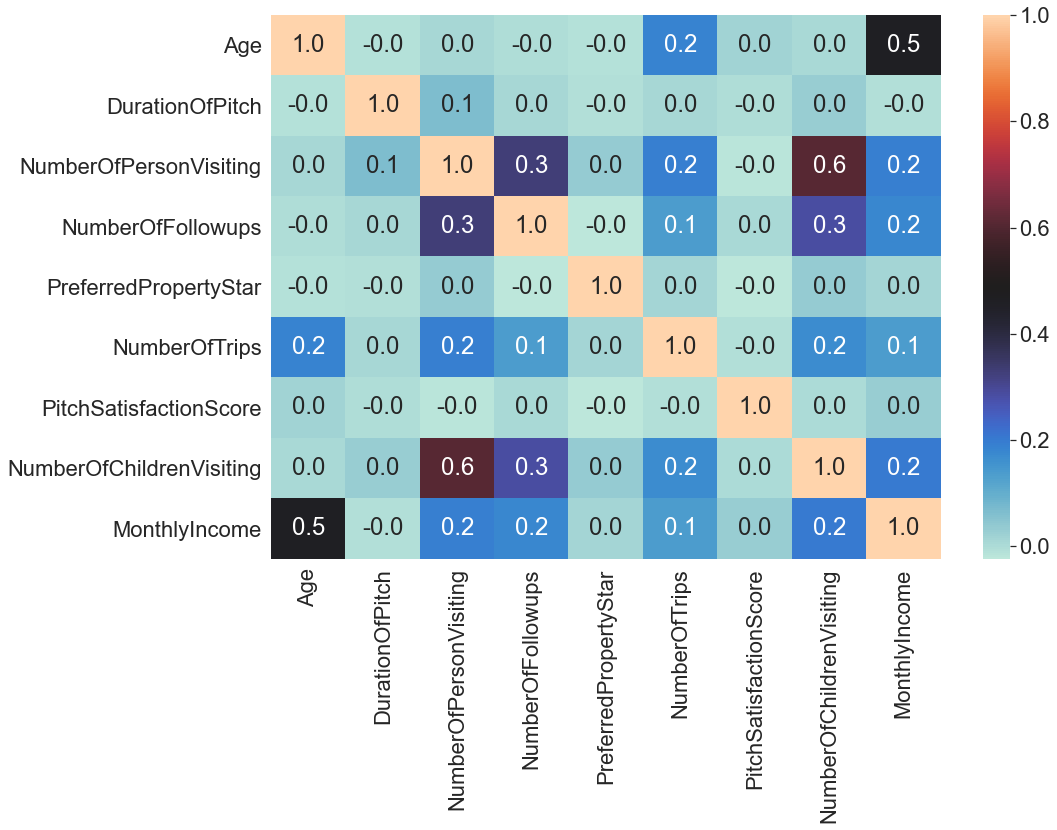

In [24]:
#We shall use a heat map to check the correlation between numerical variables

#Array containing the names of numerical variables
num_vals = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
            'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting',
           'MonthlyIncome'];
fig,ax = plt.subplots(figsize=(15,10));

sns.heatmap(df[num_vals].corr(),ax=ax,annot=True, cmap='icefire', fmt='.1f');

### Observations

* Most of the variables have little to no correlation with the exception of the variables `NumberOfChildrenVisiting` and `NumberOfPersonVisiting` that seems to be somewhat postively correlated.
* There is also some slight positive correlation between `Age` and `MonthlyIncome`.

## Let's look at regression plots of variables with some positive correlation 

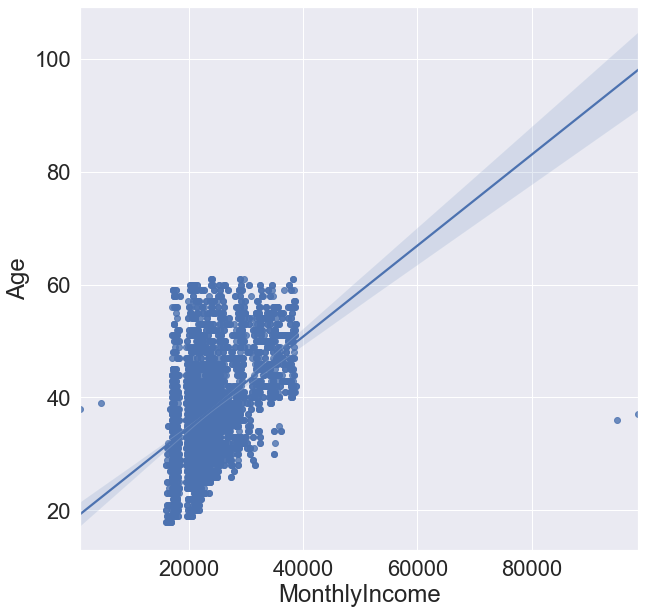

In [25]:
#We can create a regression plot that shall draw a regression line--
#--through the scatter plot to help us visualize the positive correlation

plt.figure(figsize=(10,10))
sns.regplot(x='MonthlyIncome',y='Age', data=df); #Plotting a regression plot with MonthlyIncome on the x-axis and Age on the y-axis

* This confirms the postive correlation between these two variables which we saw earlier from the correlation plot.
* It may be indicating that the older a customer is, the higher their monthly income. 

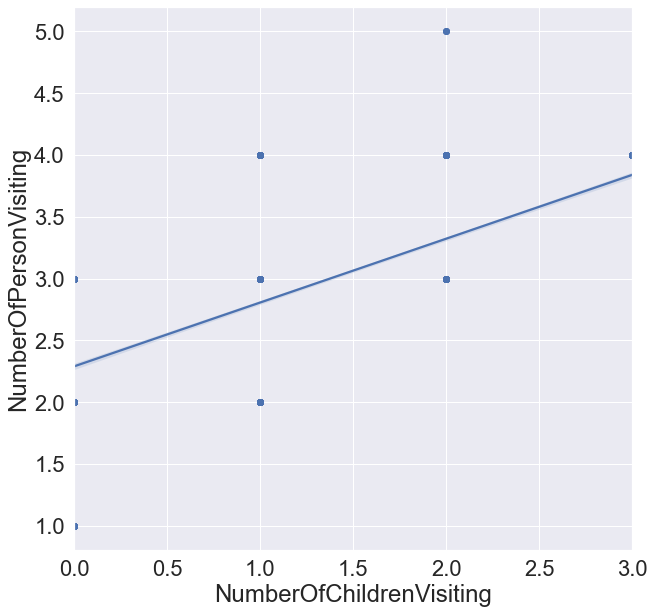

In [26]:
plt.figure(figsize=(10,10))

#Plotting a regression plot with NumberOfChildrenVisiting on the x-axis and NumberOfPersonVisiting on the y-axis
sns.regplot(x='NumberOfChildrenVisiting',y='NumberOfPersonVisiting', data=df);

* The same goes for the positive correlation between `NumberOfPersonVisiting` and `NumberOfChildrenVisiting`.

## Let's look at variables put against the `ProdTaken` variable

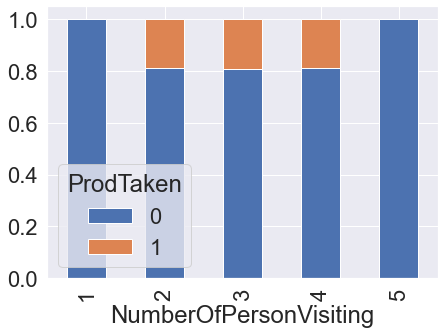

In [27]:
fig,ax = plt.subplots(figsize=(7,5));

npv=pd.crosstab(df['NumberOfPersonVisiting'],df['ProdTaken']);
npv.div(npv.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* This graph shows us customers who want to visit with 2-4 persons seem to have higher tendencies of purchasing a package.

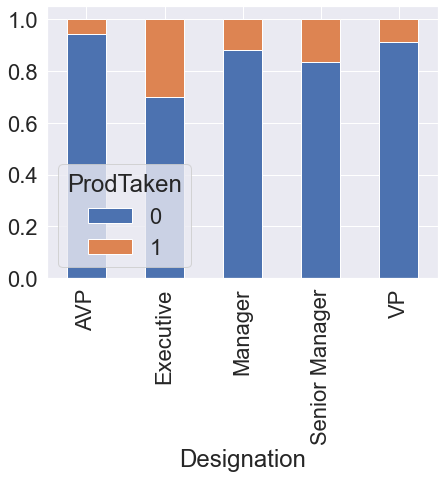

In [28]:
fig,ax = plt.subplots(figsize=(7,5));

desi=pd.crosstab(df['Designation'],df['ProdTaken'])
desi.div(desi.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* Customers in "Executive" positions seem to have a higher tendency to buy the package, unlike those who hold the "AVP" and "VP" position at their designated places of work.

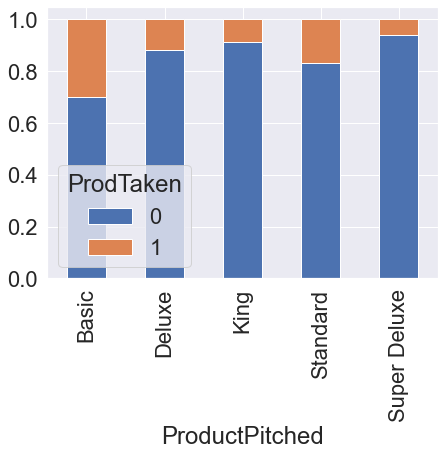

In [29]:
fig,ax = plt.subplots(figsize=(7,5));

pp=pd.crosstab(df['ProductPitched'],df['ProdTaken'])
pp.div(pp.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax);

* Customers who were pitched the Basic plan have a higher tendency to buy the package than those who were pitched other plans. 

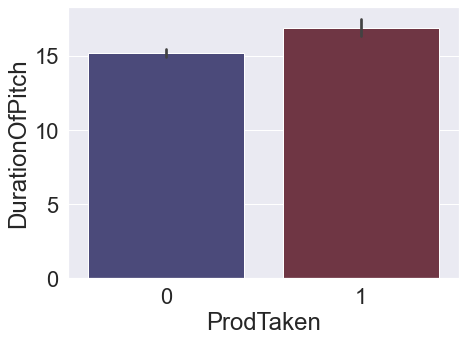

In [30]:
#Bar plot with ProdTaken on the x-axis and DurationOfPitch on the y-axis
plt.figure(figsize=(7,5))
sns.barplot(x='ProdTaken', y='DurationOfPitch', data=df, palette='icefire');

* Customers who were pitched for longer durations seem to have ended up buying the package.

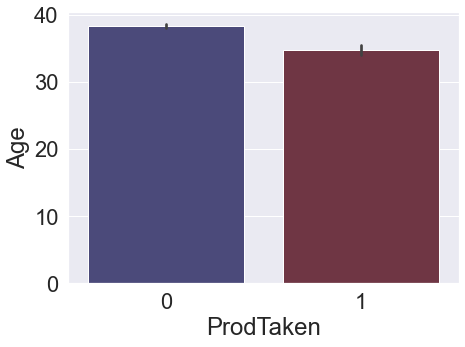

In [31]:
#Bar plot with ProdTaken on the x-axis and DurationOfPitch on the y-axis
plt.figure(figsize=(7,5))
sns.barplot(x='ProdTaken', y='Age', data=df, palette='icefire');

* This may be siginifying that customers who are slightly below 35 years of age have a tendency of buying the package.

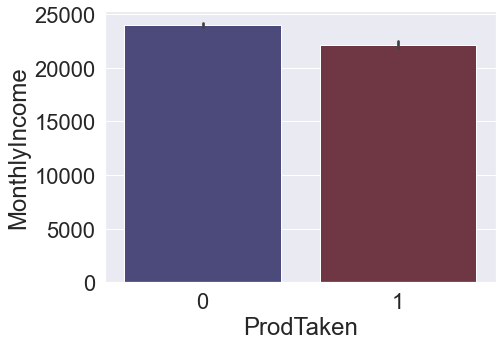

In [32]:
#Bar plot with ProdTaken on the x-axis and DurationOfPitch on the y-axis
plt.figure(figsize=(7,5))
sns.barplot(x='ProdTaken', y='MonthlyIncome', data=df, palette='icefire');

* Customers with lower incomes seem to have bought the package compared to those with higher incomes.

# Data Preparation

### Missing Value Treatment

In [33]:
#Dropping all rows that have missing values

df = df.dropna()

In [34]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* All null values have been dropped.

In [35]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 4128 rows and 20 columns.


* There are no missing values in the dataset.
* because we have dropped some rows, we shall have a new count for the number of rows.

In [36]:
# Dropping the CustomerID column because it's not needed
df.drop(['CustomerID'],axis=1,inplace=True)

# Model Building

In [37]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [38]:
# Separating our dependent and independent variables

X = df.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [39]:
#Spliting the data into train and test sets in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

X_train.shape, X_test.shape

((2889, 28), (1239, 28))

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [40]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Building our models

We shall be using Accuracy, Precision and Recall as metrics for evaluating our models, with a major focus on Precision seeing as we would like to minimize the False Positives i.e. us predicting a customer would buy a package and they ended up not buying it. 

## Decision Tree

In [42]:
#Decision Tree with the default criteria "gini" and hyperparameter class_weight to give more weightage to the 1's
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [43]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

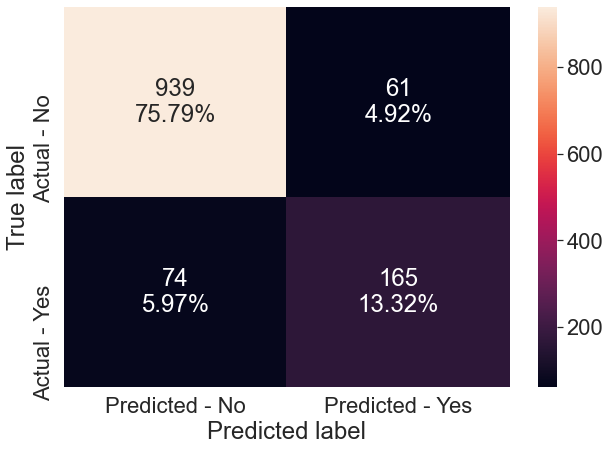

In [44]:
make_confusion_matrix(dtree,y_test)

In [45]:
get_metrics_score(dtree);

Accuracy on training set :  1.0
Accuracy on test set :  0.8910411622276029
Recall on training set :  1.0
Recall on test set :  0.6903765690376569
Precision on training set :  1.0
Precision on test set :  0.7300884955752213


* Based on the differences in recall and precision on our train and test sets, it is clear that our decision tree is overfitting the data.

## Bagging Classifier

In [46]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

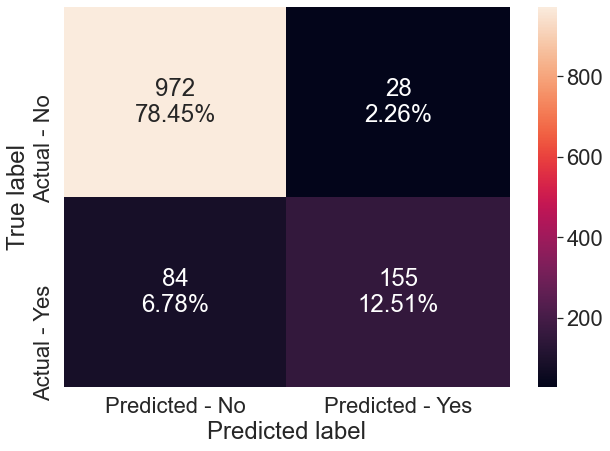

In [47]:
make_confusion_matrix(bagging,y_test)

In [48]:
get_metrics_score(bagging);

Accuracy on training set :  0.993423329871928
Accuracy on test set :  0.9096045197740112
Recall on training set :  0.9695340501792115
Recall on test set :  0.6485355648535565
Precision on training set :  0.996316758747698
Precision on test set :  0.8469945355191257


* Once again, similar to the decision tree model, our bagging model seems to do relatively well in terms of accuracy, but when we look at the recall on test and training sets, it tends to overfit.

## Bagging Classifier with the weighted Decision Tree

In [49]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

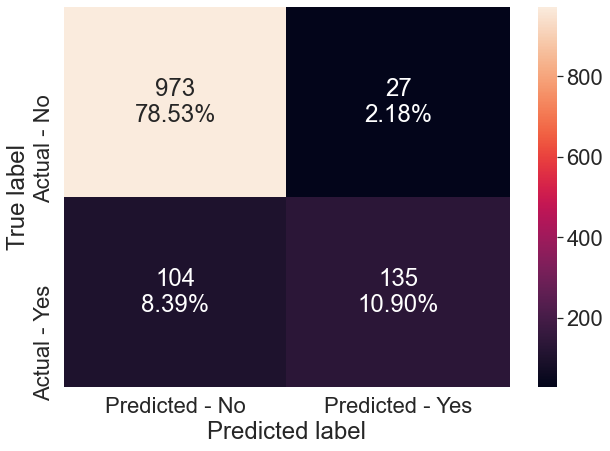

In [50]:
make_confusion_matrix(bagging_wt,y_test)

In [51]:
get_metrics_score(bagging_wt);

Accuracy on training set :  0.9920387677397023
Accuracy on test set :  0.8942695722356739
Recall on training set :  0.9587813620071685
Recall on test set :  0.5648535564853556
Precision on training set :  1.0
Precision on test set :  0.8333333333333334


* We see a very slight drop in accuracy on our test set, while we see a significant drop in recall, once again this model is also overfitting the data.
* Precision is high but the model still overfits.

## Random Forest

In [52]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

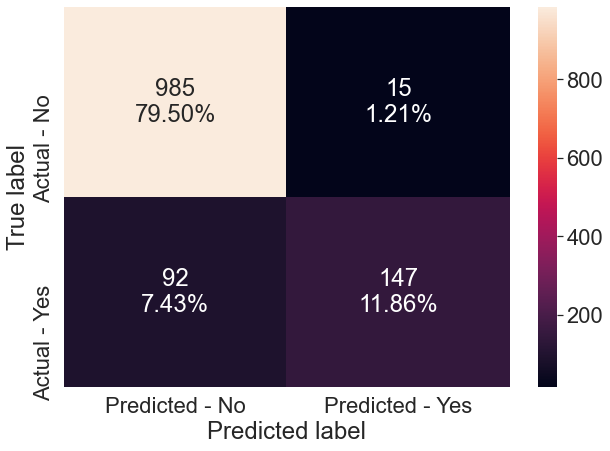

In [53]:
make_confusion_matrix(rf,y_test);

In [54]:
get_metrics_score(rf);

Accuracy on training set :  1.0
Accuracy on test set :  0.9136400322841001
Recall on training set :  1.0
Recall on test set :  0.6150627615062761
Precision on training set :  1.0
Precision on test set :  0.9074074074074074


* There's a slight improvement in recall from the previous model and a slight improvement in accuracy also.
* There's a major improvement in precision which is really good.

## Random Forest with Class Weights

In [55]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

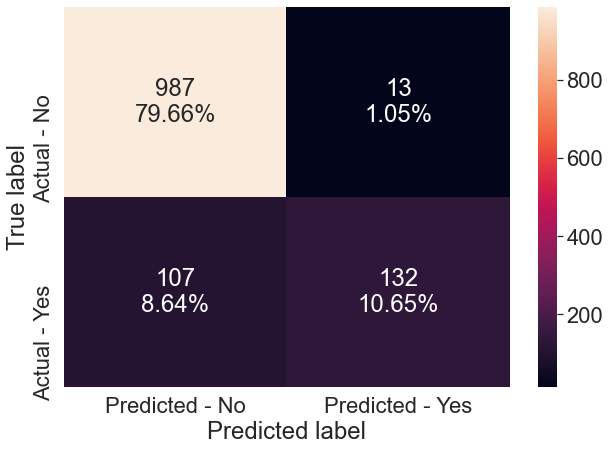

In [56]:
make_confusion_matrix(rf_wt,y_test);

In [57]:
get_metrics_score(rf_wt);

Accuracy on training set :  1.0
Accuracy on test set :  0.9031476997578692
Recall on training set :  1.0
Recall on test set :  0.5523012552301255
Precision on training set :  1.0
Precision on test set :  0.9103448275862069


* Accuracy and Precision look good on this model, although recall seems to have dropped once more.

## Hyperparameter Tuning

In a bid to try to improve the efficieny of our models, we can tweak a few hyperparameters to try and get better results.

### Hypertuning Decision Tree

In [58]:
#this is to choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

#for the grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

#the type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

#to help run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

#to set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

#help find the fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=15, random_state=1)

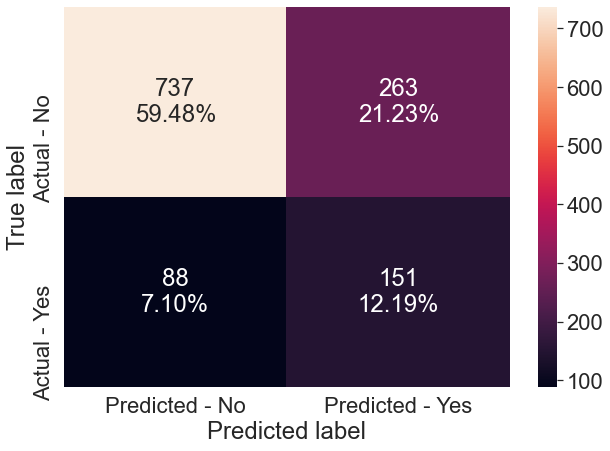

In [59]:
make_confusion_matrix(dtree_estimator,y_test)

In [60]:
get_metrics_score(dtree_estimator);

Accuracy on training set :  0.7590861889927311
Accuracy on test set :  0.7167070217917676
Recall on training set :  0.7150537634408602
Recall on test set :  0.6317991631799164
Precision on training set :  0.42628205128205127
Precision on test set :  0.3647342995169082


* Although Accuracy dropped with this particular model, we can see that the model almost does not overfit unlike its predecessors.
* Recall has improved but Precision is really poor on the model.

### Hypertuning Bagging Classifier

In [61]:
#getting the grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='precision')

In [62]:
##trying to see which one is the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

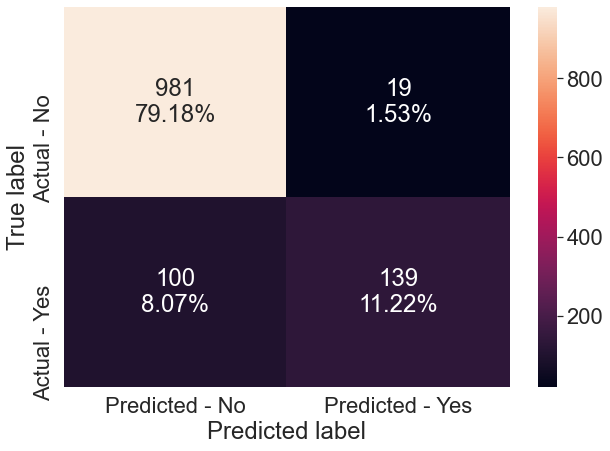

In [63]:
make_confusion_matrix(bagging_estimator,y_test)

In [64]:
get_metrics_score(bagging_estimator);

Accuracy on training set :  1.0
Accuracy on test set :  0.903954802259887
Recall on training set :  1.0
Recall on test set :  0.5815899581589958
Precision on training set :  1.0
Precision on test set :  0.879746835443038


* There is a slight drop in Accuracy while Recall is relatively similar to the previous model.
* Once again Precision is quite poor.

### Hypertuning Random Forest

In [65]:
#to help choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

#check the grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.9, n_estimators=251,
                       random_state=1)

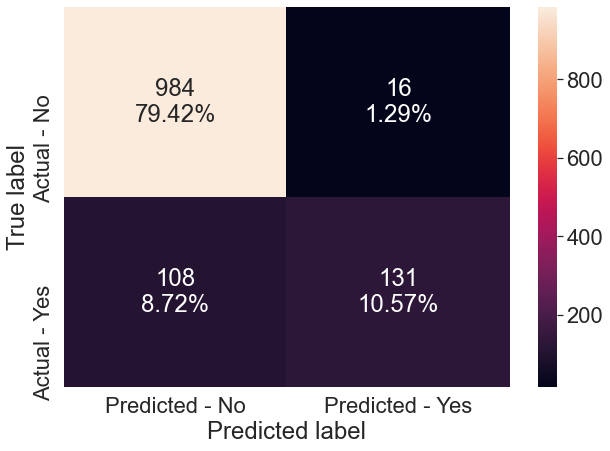

In [66]:
make_confusion_matrix(rf_estimator,y_test)

In [67]:
get_metrics_score(rf_estimator);

Accuracy on training set :  1.0
Accuracy on test set :  0.8999192897497982
Recall on training set :  1.0
Recall on test set :  0.5481171548117155
Precision on training set :  1.0
Precision on test set :  0.891156462585034


* With the hypertuning of the random forest, this model gives the most general oversight when looking at all three metrics.
* Accuracy and Precision are really good even though the model slightly overfits.

## Let us put all models done so far against one another to compare

In [68]:
# defining list of models
models = [dtree, bagging, bagging_wt ,rf , rf_wt, dtree_estimator, bagging_estimator, rf_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [69]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Bagging Classifier',
                                          'Bagging Classifier with class weights', 'Random Forest',
                                          'Random Forest with class weights','Hypertuned Decision Tree',
                                          'Hypertuned Bagging Classifier', 'Hypertuned Random Forest'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.89,1.00,0.69,1.00,0.73
1,Bagging Classifier,0.99,0.91,0.97,0.65,1.00,0.85
2,Bagging Classifier with class weights,0.99,0.89,0.96,0.56,1.00,0.83
3,Random Forest,1.00,0.91,1.00,0.62,1.00,0.91
4,Random Forest with class weights,1.00,0.90,1.00,0.55,1.00,0.91
5,Hypertuned Decision Tree,0.76,0.72,0.72,0.63,0.43,0.36
6,Hypertuned Bagging Classifier,1.00,0.90,1.00,0.58,1.00,0.88
7,Hypertuned Random Forest,1.00,0.90,1.00,0.55,1.00,0.89


* We can see from this that the Hypertuned Random Forest gives the highest accuracy, while Hypertuned Bagging Classifier gives the highest recall.
* Random Forest gives the highest Precision so that is also a good model for us.
* Hypertuned Random Forest seems to be the most overall balanced model when looking at all three metrics.

### Let us check  the important features in our Hypertuned Random Forest Model

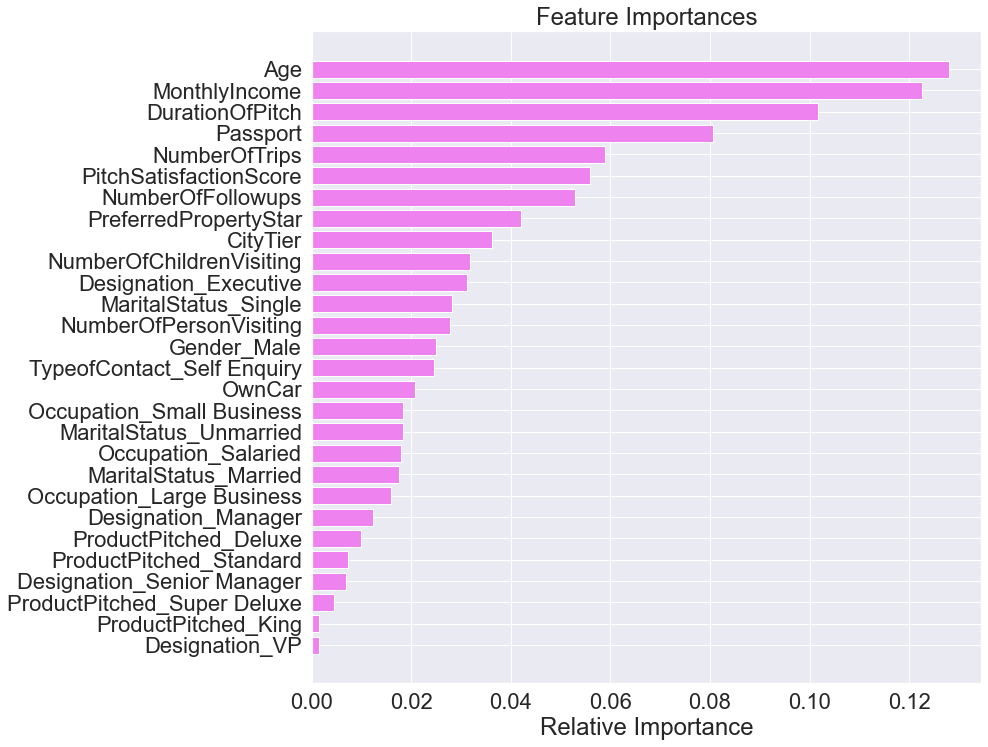

In [70]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

* The top 3 most important features are `Age`, `MonthlyIncome` and `DurationOfPitch` 

## Let us use some Boosting techniques to get better results


### Building AdaBoost Classifier Model

In [71]:
adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

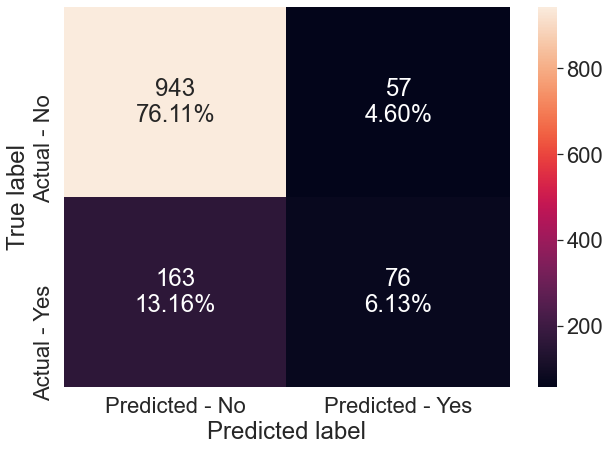

In [72]:
make_confusion_matrix(adb, y_test)

In [73]:
get_metrics_score(adb);

Accuracy on training set :  0.8497750086535133
Accuracy on test set :  0.8224374495560937
Recall on training set :  0.3942652329749104
Recall on test set :  0.3179916317991632
Precision on training set :  0.6962025316455697
Precision on test set :  0.5714285714285714


* The model does not overfit as much, but does really poorly in terms of recall, although the accuracy is decent, it does quite averagely in terms of Precision.

### Building Gradient Boosting Classifier Model

In [74]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

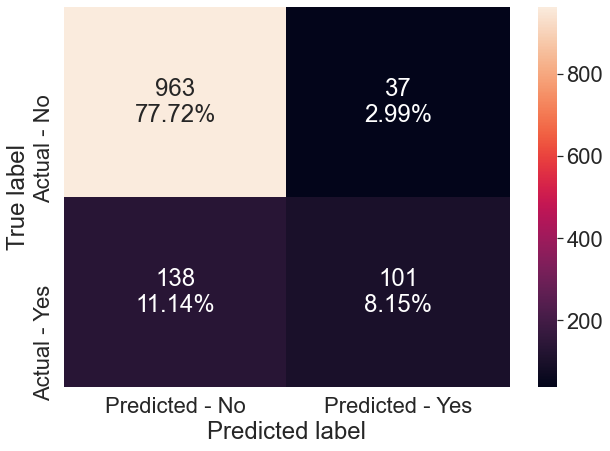

In [75]:
make_confusion_matrix(gb, y_test)

In [76]:
get_metrics_score(gb);

Accuracy on training set :  0.9016960886119765
Accuracy on test set :  0.8587570621468926
Recall on training set :  0.5609318996415771
Recall on test set :  0.4225941422594142
Precision on training set :  0.8892045454545454
Precision on test set :  0.7318840579710145


* The Gradient boosting model does better than the ada boosting model across all metrics. We see an improvement in accuracy and precision.
* Recall is also improved but now the model is slightly overfitting the data. 

### Building XGBoost Classifier Model

In [77]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

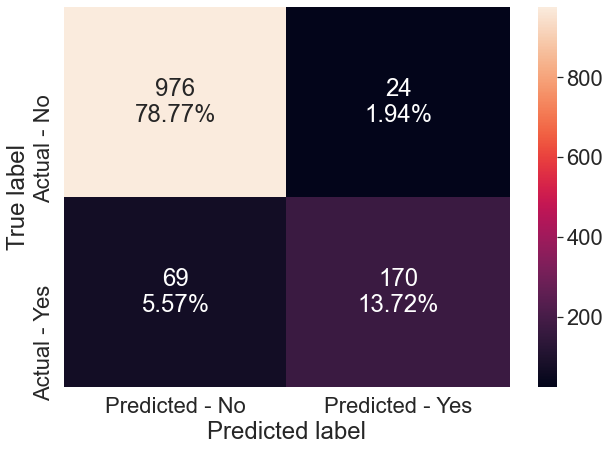

In [78]:
make_confusion_matrix(xgb, y_test)

In [79]:
get_metrics_score(xgb);

Accuracy on training set :  0.9996538594669436
Accuracy on test set :  0.9249394673123487
Recall on training set :  0.9982078853046595
Recall on test set :  0.7112970711297071
Precision on training set :  1.0
Precision on test set :  0.8762886597938144


* Here we can see all metrics across have improved, with accuracy and precision being really good and recall being good too but the model still overfits a bit.

## Hyperparameter Tuning for Boosting Models

Let us see if we can get improved results when we use and tweak hyperparamaters on our models. 

### Hypertuned AdaBoost Classifier

In [80]:
#this is to choose the type of classifier. 
adb_ht = AdaBoostClassifier(random_state=1)

#provide grid of parameters to choose from
## add from article
parameters = {
    #now we will try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(adb_ht, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
adb_ht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adb_ht.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.30000000000000004, n_estimators=90,
                   random_state=1)

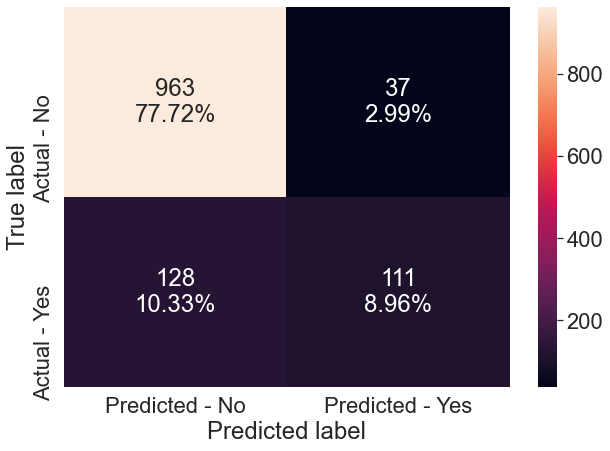

In [81]:
make_confusion_matrix(adb_ht, y_test)

In [82]:
get_metrics_score(adb_ht);

Accuracy on training set :  0.9470404984423676
Accuracy on test set :  0.8668280871670703
Recall on training set :  0.7544802867383512
Recall on test set :  0.46443514644351463
Precision on training set :  0.9633867276887872
Precision on test set :  0.75


* The accuracy for this model is good, although the model is overfitting and recall is poor.

### Hypertuned Gradient Boosting Classifier

In [83]:
# Choosing the type of classifier. 
gb_ht = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}


# Run the grid search
grid_obj = GridSearchCV(gb_ht, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_ht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_ht.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

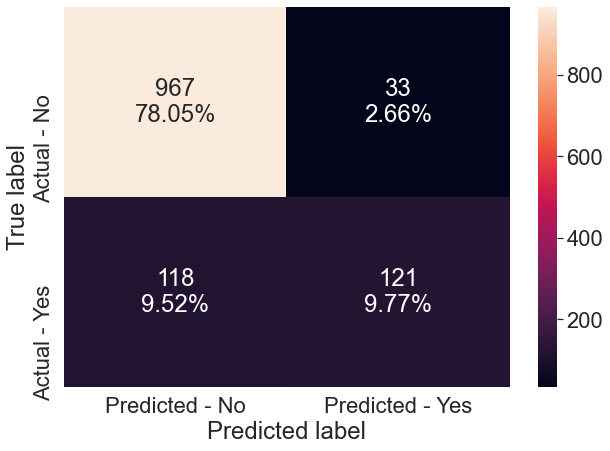

In [84]:
make_confusion_matrix(gb_ht, y_test)

In [85]:
get_metrics_score(gb_ht);

Accuracy on training set :  0.9425406715126341
Accuracy on test set :  0.8781275221953188
Recall on training set :  0.7311827956989247
Recall on test set :  0.5062761506276151
Precision on training set :  0.9622641509433962
Precision on test set :  0.7857142857142857


* The accuracy slightly improved from the previous model, this also overfits slightly with precision also having a very slight increase.

### Hypertuned XGBoosting Classifier

In [86]:
#this will choose the type of classifier. 
xgb_ht = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_ht, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [87]:
# Set the clf to the best combination of parameters
xgb_ht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_ht.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

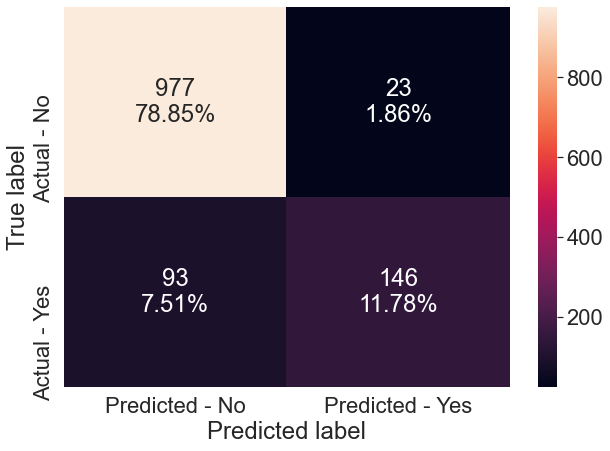

In [88]:
make_confusion_matrix(xgb_ht, y_test)

In [89]:
get_metrics_score(xgb_ht);

Accuracy on training set :  0.9754240221529941
Accuracy on test set :  0.9063761097659403
Recall on training set :  0.8763440860215054
Recall on test set :  0.6108786610878661
Precision on training set :  0.9959266802443992
Precision on test set :  0.863905325443787


* The accuracy and precision on this model are quite good, the model overfits a bit but is better than the previous model. 

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [90]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gb_ht)]
final_estimator= XGBClassifier(random_state=1)

In [98]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train);

[13:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


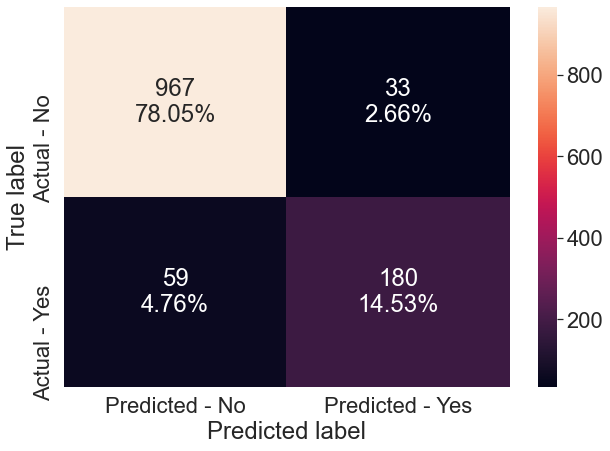

In [92]:
make_confusion_matrix(stacking_estimator,y_test)

In [93]:
get_metrics_score(stacking_estimator);

Accuracy on training set :  1.0
Accuracy on test set :  0.9257465698143664
Recall on training set :  1.0
Recall on test set :  0.7531380753138075
Precision on training set :  1.0
Precision on test set :  0.8450704225352113


* Accuracy is really good on this model, and we see an improvement in recall and a slight drop in precision. 

## Let us look at and compare all models and performance metrics

In [94]:
#this is to define the list of models which were used earlier
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,
          rf_estimator,adb,gb,xgb,adb_ht,gb_ht,xgb_ht,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [95]:
#this will create a table for comparisions of the models used for easier insight and better evaluation
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Hypertuned Decision Tree','Bagging Classifier',
                                          'Bagging Classifier with class weights','Hypertuned Bagging Classifier',
                                          'Random Forest','Random Forest with class weights','Hypertuned Random Forest',
                                          'Adaboost Classifier','Gradient Boosting Classifier','XGBoost classifier',
                                          'Hypertuned Adaboost Classifier','Hypertuned Gradient Boosting Classifier',
                                          'Hypertuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test}) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,Decision Tree,1.00,0.89,1.00,0.73,1.00,0.69
1,Hypertuned Decision Tree,0.76,0.72,0.43,0.36,0.72,0.63
2,Bagging Classifier,0.99,0.91,1.00,0.85,0.97,0.65
3,Bagging Classifier with class weights,0.99,0.89,1.00,0.83,0.96,0.56
4,Hypertuned Bagging Classifier,1.00,0.90,1.00,0.88,1.00,0.58
5,Random Forest,1.00,0.91,1.00,0.91,1.00,0.62
6,Random Forest with class weights,1.00,0.90,1.00,0.91,1.00,0.55
7,Hypertuned Random Forest,1.00,0.90,1.00,0.89,1.00,0.55
8,Adaboost Classifier,0.85,0.82,0.70,0.57,0.39,0.32
9,Gradient Boosting Classifier,0.90,0.86,0.89,0.73,0.56,0.42


* Random Forest and Random Forest with weights are the best models in terms of Precision here as they do really well and similar.
* We could also look at Hypertuned Random Forest and XGBoost Classifier if we are looking for still good models in terms of precision that have slightly improved recall.

### Feature Importance of XGBoost Classifier

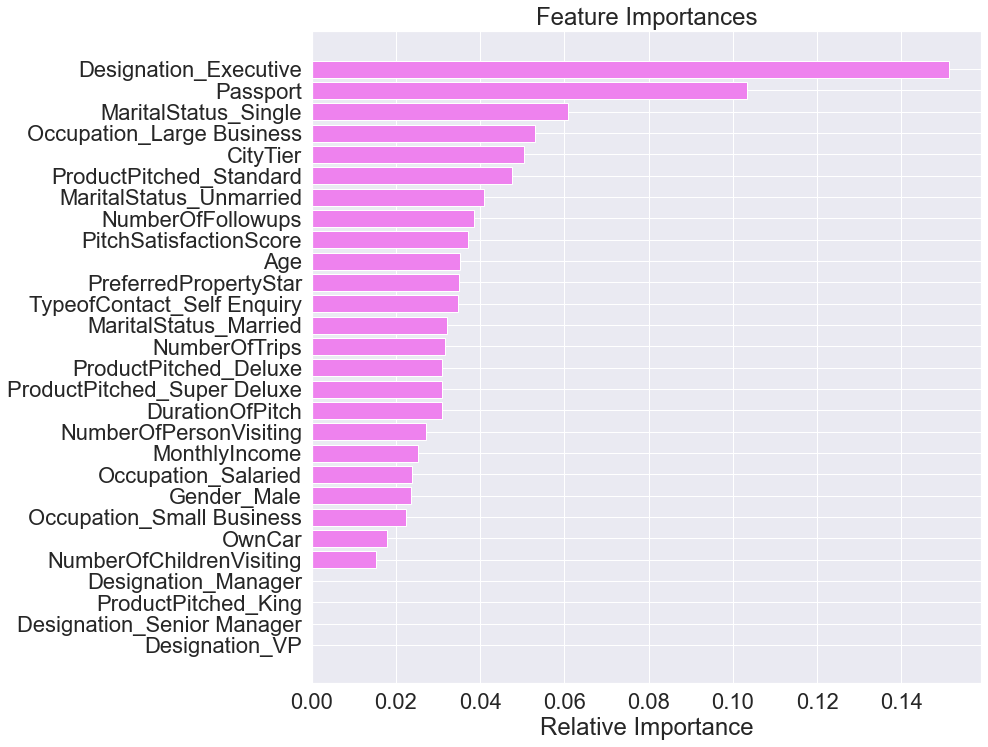

In [96]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

* The top 3 features for this model are `Designation`, `Passport` and `MaritalStatus`.

### Feature Importance of Random Forest

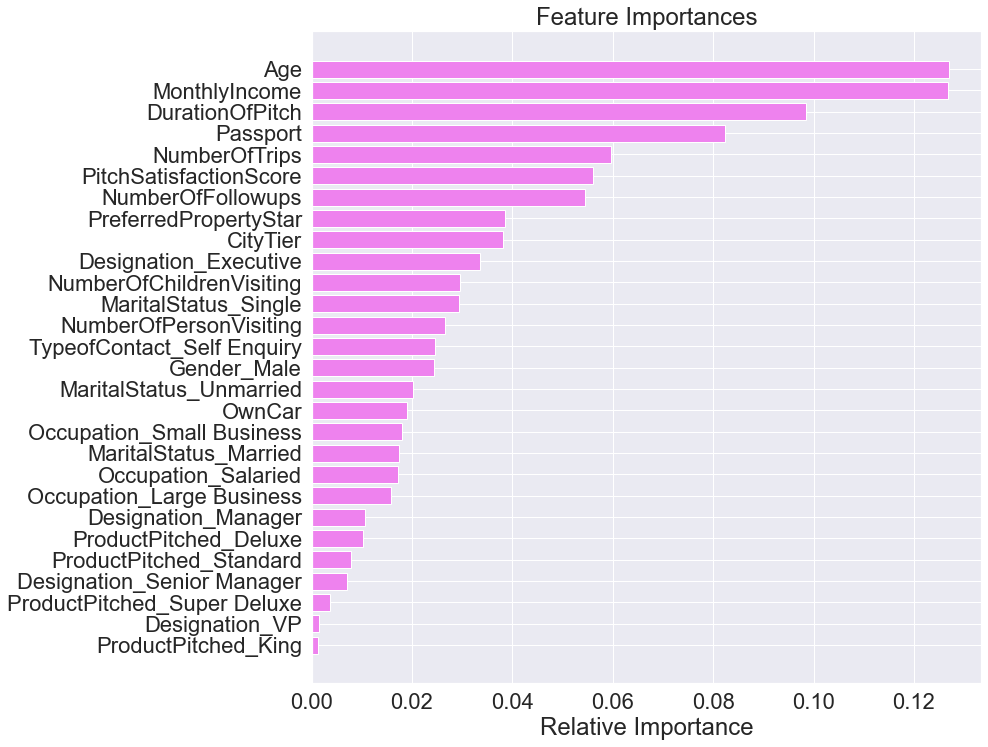

In [97]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();

* The top 3 most important features are `Age`, `MonthlyIncome` and `DurationOfPitch` 

-----------------------

* In summary we can use the Random Forest model to make our predictions as accurate as 91% of the time which is really good, although with this model it may predict a few where we say they wouldn't buy the package and they actually do. Overall, it is a really good model. 

## <a id = "link8"></a> Business Recommendations

- We can use our final model to predict quite accurately whether a customer shall buy a package or not.
- The most important features for our model were `Age`, `MonthlyIncome` and `DurationOfPitch`, these are areas we can focus on and take into consideration when trying to approach customers.
- We should see an improvement in turnovers if we pitch products for longer durations to our customers, also customers who are above 35 years of age seem to not be as interested in the package, so we should concentrate on customers below 35 years of age.
- Since `MonthlyIncome` plays a major part in our model, we can look at the demographics of what range in terms of monthly earnings would be intrested in buying the product. On a surface level, we could say customers who have lower incomes are more interested in buying the product using a threshold of below 20,000 but we shall have to further investigate that to give more accurate and efficient ranges.
- We also discovered that customers who were pitched the basic plan had a higher tendency to buy the package, so we should get better results if we pitch that plan to more customers.
- Also customers who are of the "Executive" position in their designated workplaces should be targeted for pitches, along with customers who want to travel with 2-4 people.
- From our analysis, we found out most people do not own a passport, and from our model `Passport` is relatively quite high in importance coming in at the 4th most important. We can say if we target customers without passports, we should be able to see more success in them buying the package. 